In [3]:
import numpy as np
N = 5
D = 2

print(x)


indices_array = np.where(np.ones_like(x))
indices_array = list(zip(indices_array[0], indices_array[1]))
print(indices_array)
indices_array_2 = np.vdot(indices_array, indices_array)
print(indices_array_2)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
300


In [4]:
import numpy as np


ix = np.ndindex((N,)*D)
potential_array = np.zeros((N,)*D)
for index in ix:
    shifted_index = np.array(index)-np.floor(N/2)
    potential_array[index] = np.dot(shifted_index, shifted_index)
potential_array

array([[8., 5., 4., 5., 8.],
       [5., 2., 1., 2., 5.],
       [4., 1., 0., 1., 4.],
       [5., 2., 1., 2., 5.],
       [8., 5., 4., 5., 8.]])

In [41]:
import hamiltonian
from hamiltonian import *
N = 100
D = 2
hamiltonian.N = N
hamiltonian.D = D
hamiltonian.mu = 1000
hamiltonian.epsilon = 0.02
x = np.zeros((N,)*D)
psi = np.ones_like(x)
potential = potential_function(psi)



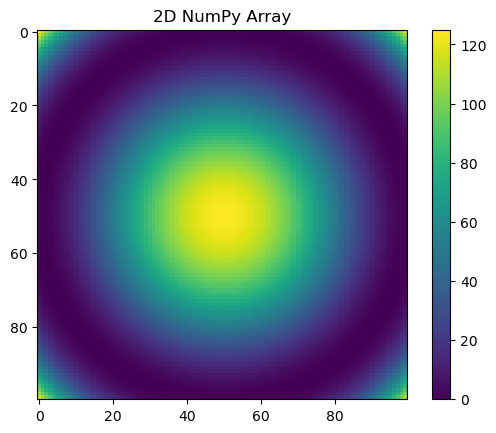

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(potential, cmap='viridis', interpolation='nearest')
plt.title('2D NumPy Array')
plt.colorbar()
plt.show()